In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

import pickle

In [3]:
data = pd.read_csv('http://bit.ly/w-data')

data.shape

(25, 2)

In [4]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


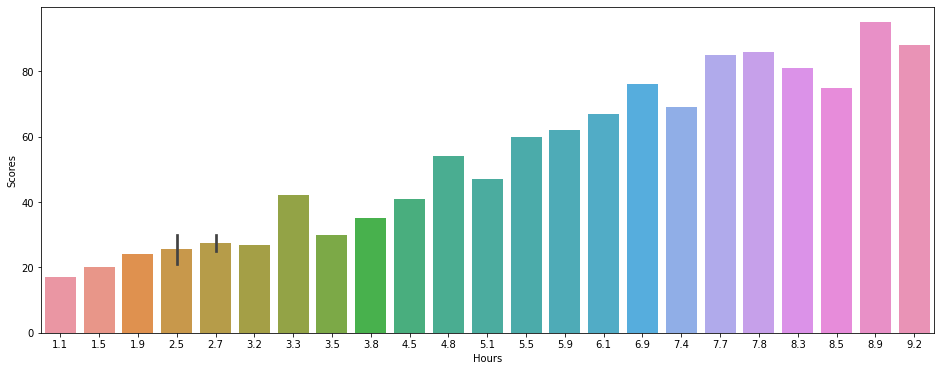

In [7]:
plt.figure(figsize=(16, 6))
sns.barplot(data=data, x='Hours', y='Scores')
plt.show()

 Build the model using simple Linear Regression

In [8]:
# Separate the dataset
array = data.values
X = array[:, 0]
Y = array[:, 1]
X = X.reshape(-1, 1)

# Split the dataset
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.33, random_state=31)

# train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

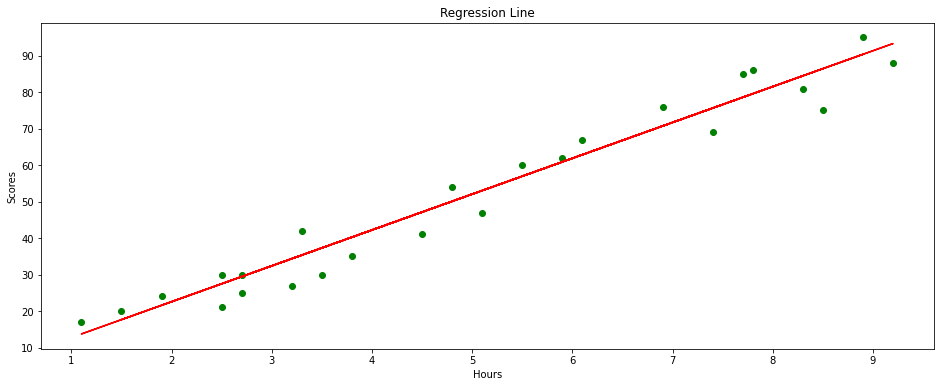

In [9]:
# Plotting the regression line

line = model.coef_*X+model.intercept_

plt.figure(figsize=(16,6))
plt.plot(X, line, color='r')
plt.scatter(X, Y, color='g')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line')
plt.show()

In [10]:
predictions = model.predict(x_valid)

accuracy = model.score(x_valid, y_valid)
print(accuracy)

error = mean_absolute_error(y_valid, predictions)
print(error)

0.954847653676284
5.003620747726505


In [12]:
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [13]:
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
